# Compute Transitions between pairs of labels

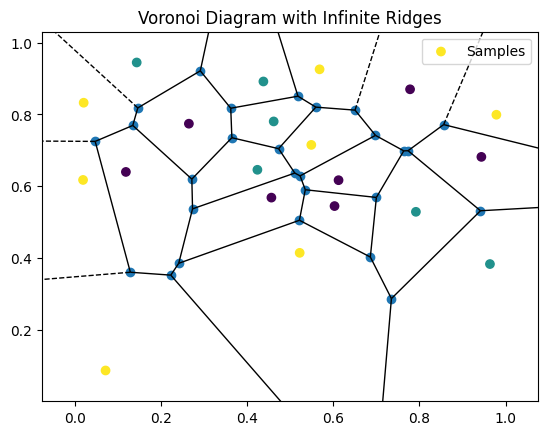

In [1]:
# Import necessary libraries
import sys
sys.path.extend(["../../"])
from src.para_voro import *
from src.para_voro_plots import *

n_points = 20
n_labels = 3

# Create a sample dataset with 10 samples
np.random.seed(0)
samples = np.random.rand(n_points, 2)
labels = np.random.randint(1, n_labels + 1, size=(n_points, ))

# Build the Voronoi diagram
vor = Voronoi(samples)

# Plot the Voronoi diagram including infinite ridges
plt.close()
fig = voronoi_plot_2d(vor, show_points=False)
plt.scatter(samples[:, 0], samples[:, 1], c=labels, label='Samples')
plt.legend()
plt.title('Voronoi Diagram with Infinite Ridges')
plt.show()


In [2]:
from itertools import combinations

unique_labels = np.unique(labels)
comb = np.array(list(combinations(unique_labels, r=2)))

In [3]:
aabbox = np.array([
    [0.0, 1.0],
    [0.0, 1.0]
])

vor = Voronoi(samples)

pairwise_ridges = [generate_geometric_segment_boundaries_via_voronoi(samples=samples, labels=labels, clip_bbox=aabbox, label_pair_to_consider=comb_pair, vor=vor, verbose=False) for comb_pair in comb]

c:\Users\bauerrn\Projekte\VoroParaSense\examples\notebooks\../..\src\para_voro.py:305: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 1, 'C', False, aligned=True), Array(float64, 1, 'A', False, aligned=True))
  d = np.dot(points[i], ridge_halfspace_definition[:-1]) + ridge_halfspace_definition[-1]


comb: [1 2]; ridges: 11


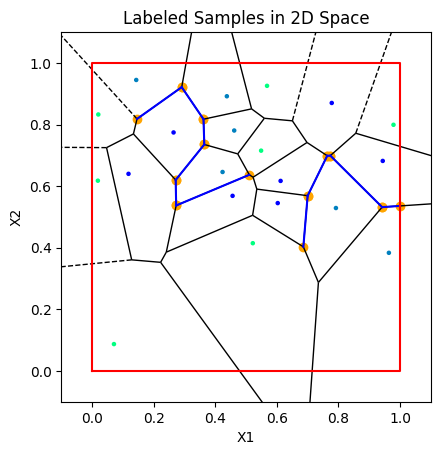

comb: [1 3]; ridges: 13


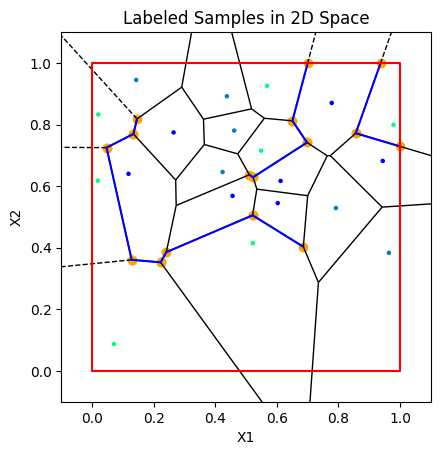

comb: [2 3]; ridges: 7


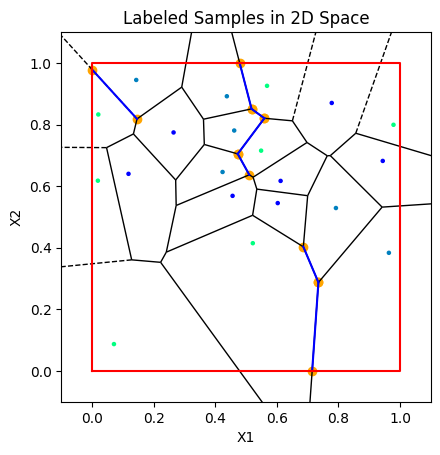

In [4]:
for c, rv in zip(comb, pairwise_ridges):
    print(f"comb: {c}; ridges: {len(rv)}")
    plot_ridges(rv, samples, labels, aabbox)

In [5]:
bw = np.array([0.1, 0.1])
pairwise_sensitivitiy = [ridge_based_para_sense(rv, bw, aabbox, return_n_ridges=True, verbose=False) for rv in pairwise_ridges]

combination: [1 2]


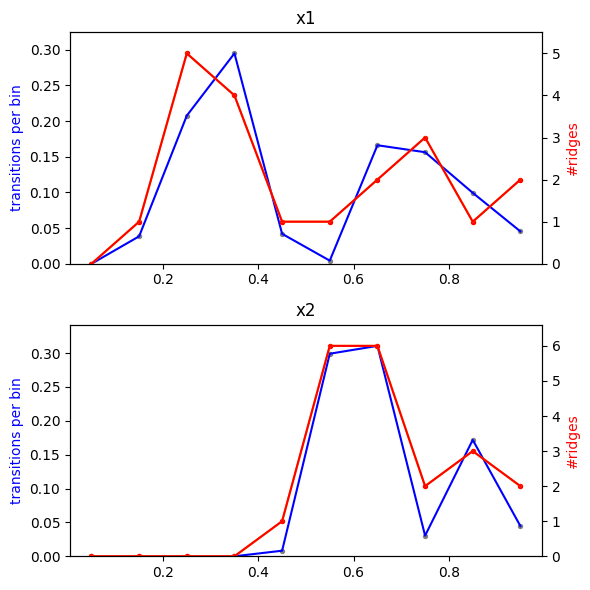

combination: [1 3]


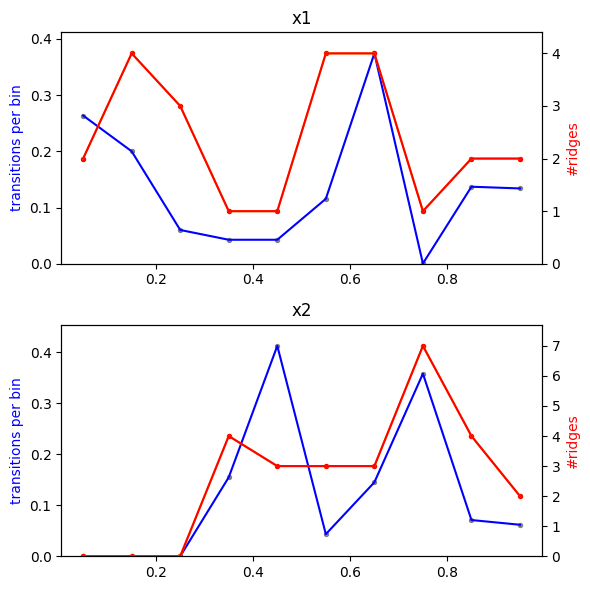

combination: [2 3]


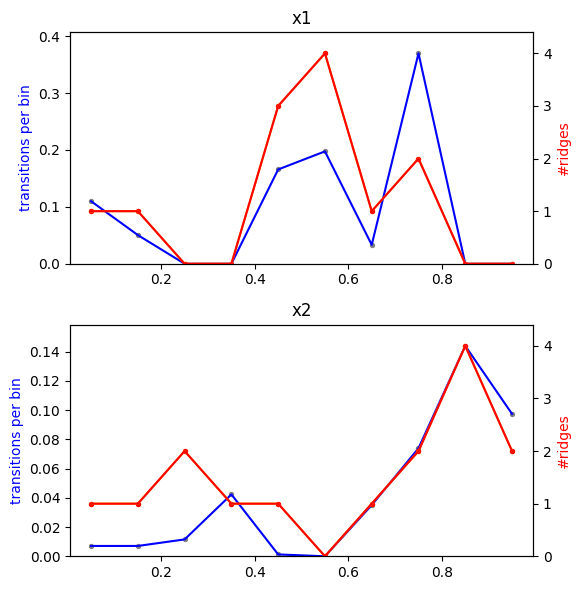

In [6]:
for c, pw in zip(comb, pairwise_sensitivitiy):
    print(f"combination: {c}")
    plot_sensitivities(pw[0], pw[1], n_ridges=pw[2])

# Iris Data Example

In [7]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris-data.csv')
samples, [uq, _, labels] = df.values[:, :-1].astype(float), np.unique(df.values[:, -1], return_index=True, return_inverse=True)

n_samples_per_dim = 30
aabbox = np.vstack([np.min(samples, 0), np.max(samples, 0)]).T
bandwidths = (aabbox[:, 1] - aabbox[:, 0]) / n_samples_per_dim

from itertools import combinations

unique_labels = np.unique(labels)
comb = np.array(list(combinations(unique_labels, r=2)))

vor = Voronoi(samples)

pairwise_ridges = [generate_geometric_segment_boundaries_via_voronoi(samples=samples, labels=labels, clip_bbox=aabbox, label_pair_to_consider=comb_pair, vor=vor, verbose=False) for comb_pair in comb]

In [8]:
bandwidths

array([0.12      , 0.08      , 0.19666667, 0.08      ])

In [9]:
comb_names = uq[comb]

In [10]:
pairwise_sensitivitiy = [ridge_based_para_sense(rv, bandwidths, aabbox, step_size=bandwidths * 0.5 , return_n_ridges=True, verbose=False) for rv in pairwise_ridges]

combination: [0 1]


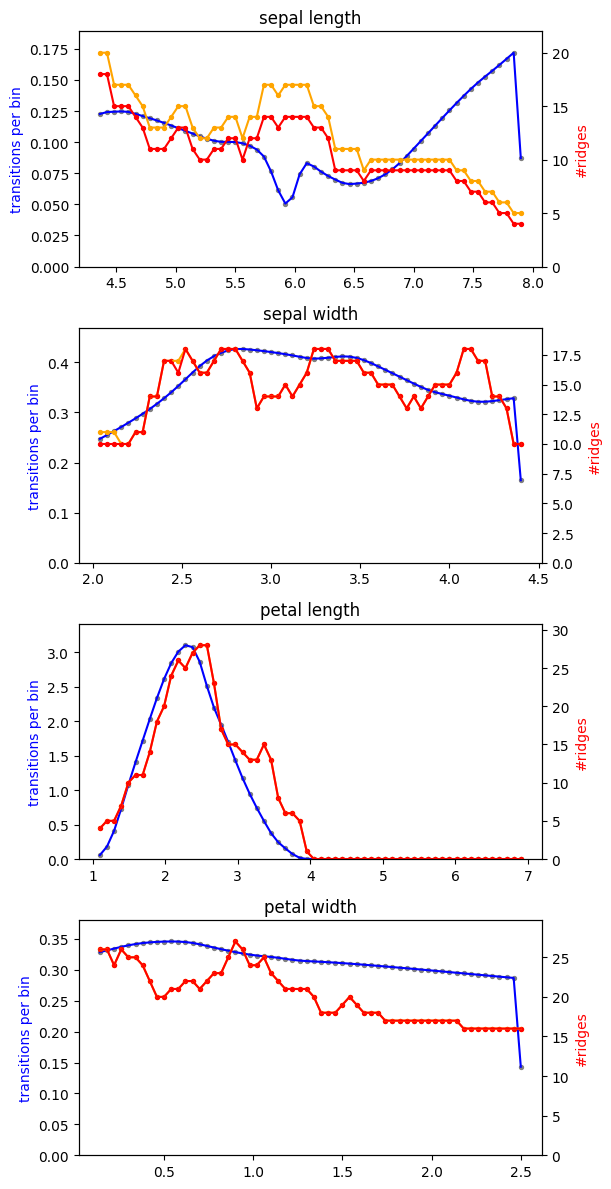

combination: [0 2]


c:\Users\bauerrn\Projekte\VoroParaSense\examples\notebooks\../..\src\para_voro_plots.py:191: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0.0, sens_values.max() * 1.1)
c:\Users\bauerrn\Projekte\VoroParaSense\examples\notebooks\../..\src\para_voro_plots.py:207: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax2.set_ylim(0.0, n_ridges_values.max() * 1.1)


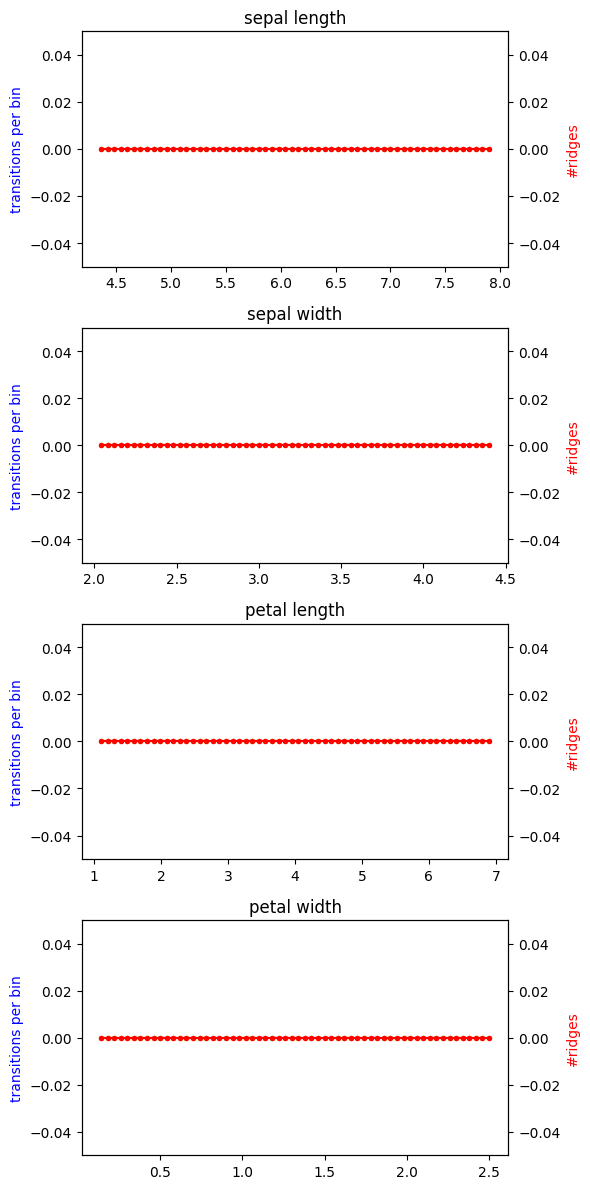

combination: [1 2]


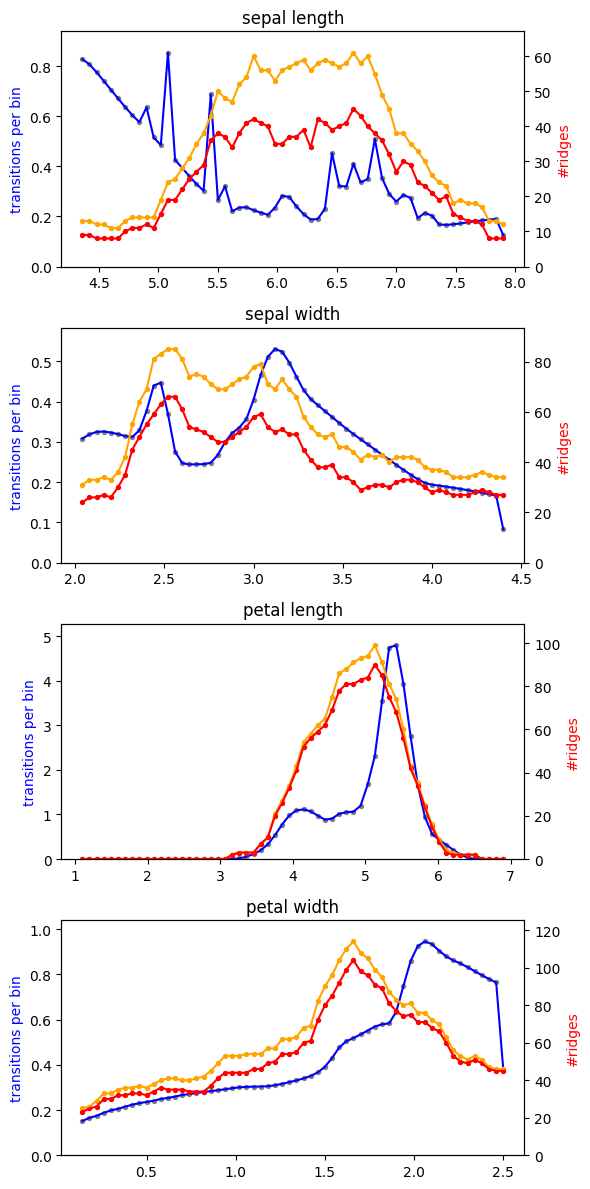

In [ ]:
for c, pw in zip(comb, pairwise_sensitivitiy):
    print(f"combination: {c}")
    plot_sensitivities(pw[0], pw[1], n_ridges=pw[2], dim_labels=df.columns[:-1].tolist())

In [12]:
def plot_multiple_sensitivities(sample_points: list, sensitivities: list, 
                       *, dim_labels: list = None, line_labels: list = None):
    """
    """
    N = len(sample_points[0])

    def _get_sens(a):
        if N == 1:
            sens_values = a[0]
        else:
            sens_values = a[dim]
        return sens_values

    fig = plt.figure(figsize=(6, N * 3))

    for dim in range(N):
        ax = fig.add_subplot(N, 1, dim+1)

        for line_i in range(len(sensitivities)):
            ax.plot(sample_points[line_i][dim], _get_sens(sensitivities[line_i]), label=line_labels[line_i] if line_labels is not None else None)
        
        ax.set_title(dim_labels[dim] if dim_labels is not None else f"x{dim+1}")
        ax.set_ylabel("transitions per bin", color="black")

        ax.set_ylim(0.0, max(sp[dim].max() for sp in sensitivities) * 1.1)

    fig.tight_layout()
    plt.legend()

    plt.show()

In [13]:
def get_idx_of_list_elements(arr: list, idx: int):
    return [a[idx] for a in arr]

C:\Users\bauerrn\AppData\Local\Temp\ipykernel_24428\4115053297.py:20: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  ax.plot(sample_points[line_i][dim], _get_sens(sensitivities[line_i]), label=line_labels[line_i] if line_labels is not None else None)


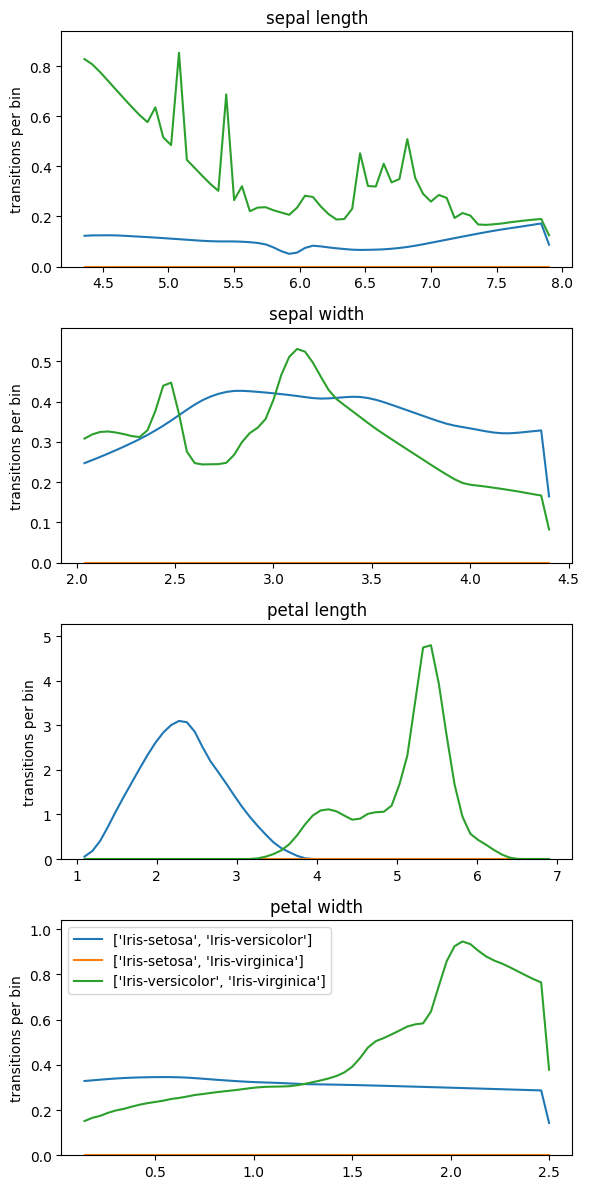

In [14]:
plot_multiple_sensitivities(get_idx_of_list_elements(pairwise_sensitivitiy, 0), get_idx_of_list_elements(pairwise_sensitivitiy, 1), dim_labels=df.columns[:-1].tolist(), line_labels=comb_names.tolist())

In [15]:
ridge_vertices, ridge_point_indices = generate_geometric_segment_boundaries_via_voronoi(samples=samples, labels=labels, clip_bbox=aabbox, vor=vor, return_original_ridge_point_indices=True, verbose=False)
M_T = build_directed_ridge_vertices_selector_matrix(samples, labels, ridge_point_indices)
ret = build_directed_transition_cubes(M_T, ridge_vertices, bandwidths=bandwidths, clip_box=aabbox, step_size=bandwidths*0.1, verbose=False)

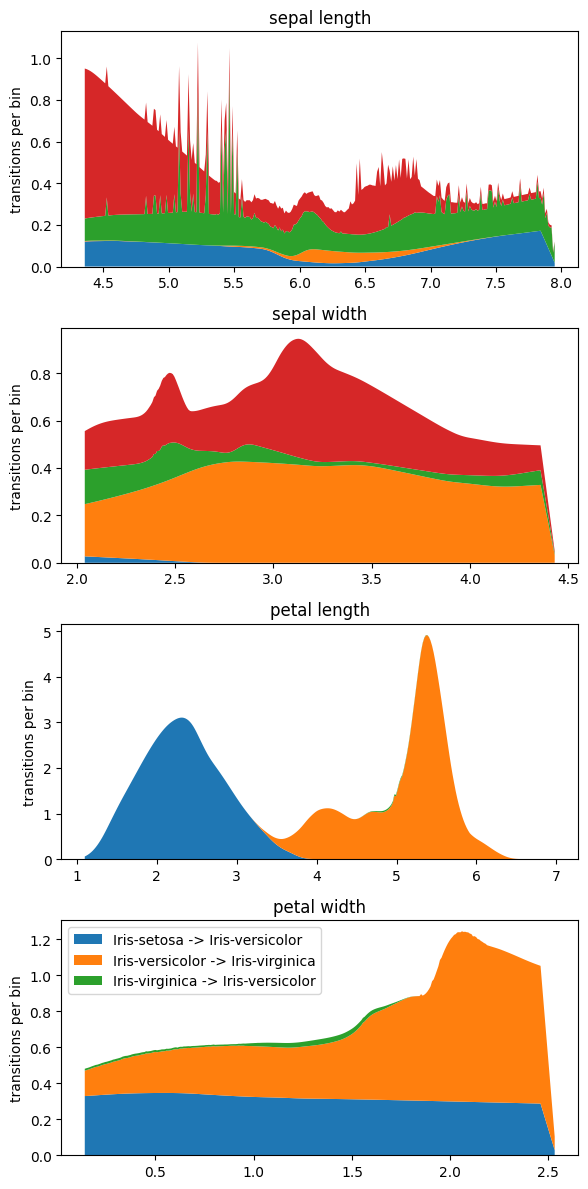

In [16]:
plot_sens_matrix_list(ret[0][0], [r[0] for r in ret[1]], dim_labels=df.columns[:-1].tolist(), line_labels=uq.tolist())

In [17]:
ridge_vertices, ridge_point_indices = generate_geometric_segment_boundaries_via_voronoi(samples=samples, labels=labels, clip_bbox=aabbox, vor=vor, return_original_ridge_point_indices=True, clip_convex_hull=True, verbose=False)
M_T = build_directed_ridge_vertices_selector_matrix(samples, labels, ridge_point_indices)
ret = build_directed_transition_cubes(M_T, ridge_vertices, bandwidths=bandwidths, clip_box=aabbox, step_size=bandwidths*0.1, verbose=False)

c:\Users\bauerrn\Projekte\VoroParaSense\examples\notebooks\../..\src\para_voro.py:211: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 1, 'A', False, aligned=True), Array(float64, 1, 'A', False, aligned=True))
  d_ = point @ eq[:-1] + eq[-1]


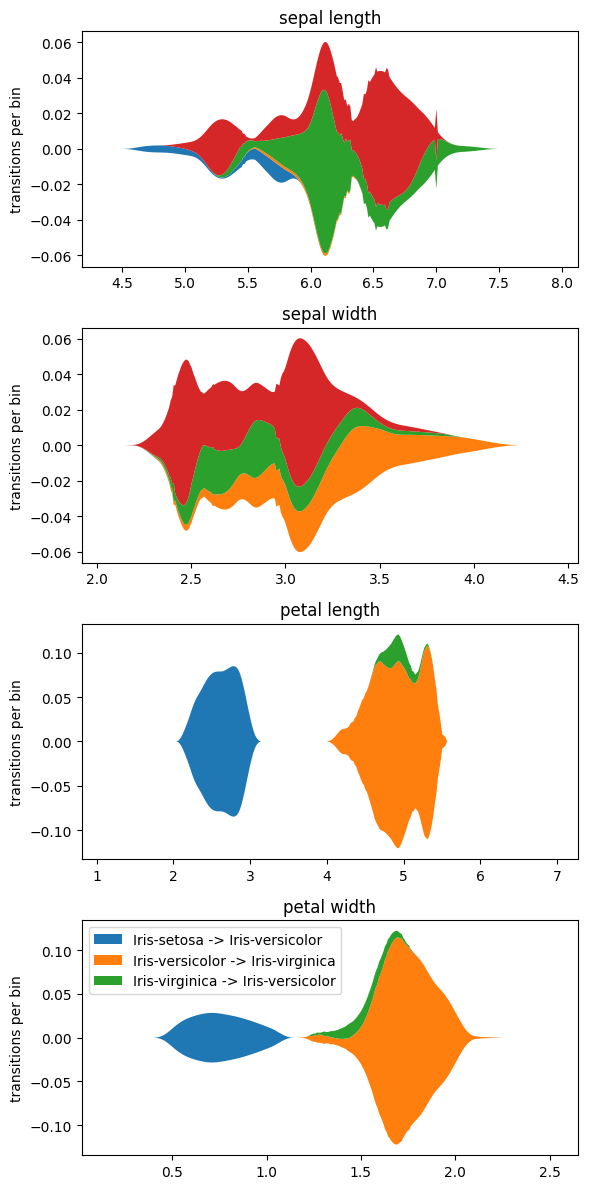

In [18]:
plot_sens_matrix_list(ret[0][0], [r[0] for r in ret[1]], dim_labels=df.columns[:-1].tolist(), line_labels=uq.tolist(), stack_plot_kwargs=dict(baseline="sym"))

In [19]:
sample_points_min_max = ret[0]

In [20]:
D_i_s, _, _, _ = compute_label_distribution(samples, labels, bandwidths, aabbox, clip_convex_hull=True, vor=vor, sample_points_min_max=sample_points_min_max)

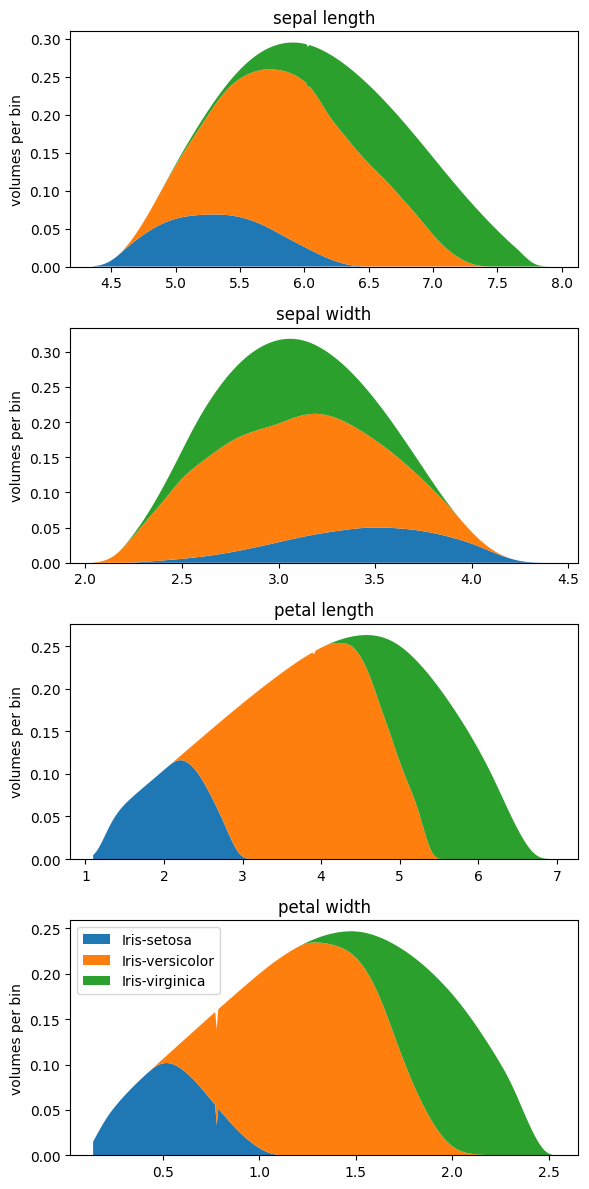

In [21]:
plot_label_distribution_matrix_list(sample_points_min_max[0], D_i_s, stack_plot=True, dim_labels=df.columns[:-1].tolist(), line_labels=uq.tolist())

In [22]:
S = [r[0] for r in ret[1]]

In [23]:
row_sums = [S[i].sum(axis=1) for i in range(len(S))]

In [24]:
col_sums = [S[i].sum(axis=0) for i in range(len(S))]

In [25]:
row_col_sums = [S[i].sum(axis=(0, 1)) for i in range(len(S))]

In [26]:
M_eq = np.full((len(row_sums), len(row_sums)), 0.0)
for i in range(len(row_sums)):
    for j in range(len(row_sums)):
        M_eq[i, j] = np.sum(np.abs(row_sums[i] - row_sums[j]))
M_eq

array([[ 0.        , 10.79947482, 20.51502212, 17.92231927],
       [10.79947482,  0.        , 23.48879141, 21.21385474],
       [20.51502212, 23.48879141,  0.        ,  8.54316674],
       [17.92231927, 21.21385474,  8.54316674,  0.        ]])

In [27]:
M_eq = np.full((len(col_sums), len(col_sums)), 0.0)
for i in range(len(col_sums)):
    for j in range(len(col_sums)):
        M_eq[i, j] = np.sum(np.abs(col_sums[i] - col_sums[j]))
M_eq

array([[ 0.        , 12.79190943, 19.08474156, 16.26643283],
       [12.79190943,  0.        , 22.97032773, 19.41845916],
       [19.08474156, 22.97032773,  0.        ,  8.54316674],
       [16.26643283, 19.41845916,  8.54316674,  0.        ]])

In [28]:
M_eq = np.full((len(row_col_sums), len(row_col_sums)), 0.0)
for i in range(len(row_col_sums)):
    for j in range(len(row_col_sums)):
        M_eq[i, j] = np.sum(np.abs(row_col_sums[i] - row_col_sums[j]))
M_eq

array([[ 0.        ,  7.87800776, 14.61746598, 11.61625295],
       [ 7.87800776,  0.        , 17.41143328, 14.82799554],
       [14.61746598, 17.41143328,  0.        ,  6.89084565],
       [11.61625295, 14.82799554,  6.89084565,  0.        ]])